# Données du service des ressources humaines

<h3>Importation des bibliothèques</h3>

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
import tarfile
import os

# Configuring display settings
plt.rcParams['figure.figsize'] = (12, 5)
sns.set()
sns.set_context('talk')
np.set_printoptions(threshold=20, precision=2, suppress=True)
pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 2)
pd.set_option('display.float_format', '{:.2f}'.format) 
warnings.filterwarnings("ignore", category=FutureWarning)

<h3>Chargement et visualisation du jeu de données</h3>

In [18]:
#Lecture du CSV
general_df = pd.read_csv("Data/general_data.csv")

#Aperçu des données
general_df.head()

#Informations générale
general_df.info()

#Statistiques descriptives
general_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4410.00,4410.00,4410.00,4410.00,4410.00,4410.00,4410.00,4391.00,4410.00,4410.00,4410.00,4401.00,4410.00,4410.00,4410.00,4410.00
mean,36.92,9.19,2.91,1.00,2205.50,2.06,65029.31,2.69,15.21,8.00,0.79,11.28,2.80,7.01,2.19,4.12
std,9.13,8.11,1.02,0.00,1273.20,1.11,47068.89,2.50,3.66,0.00,0.85,7.78,1.29,6.13,3.22,3.57
min,18.00,1.00,1.00,1.00,1.00,1.00,10090.00,0.00,11.00,8.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,30.00,2.00,2.00,1.00,1103.25,1.00,29110.00,1.00,12.00,8.00,0.00,6.00,2.00,3.00,0.00,2.00
50%,36.00,7.00,3.00,1.00,2205.50,2.00,49190.00,2.00,14.00,8.00,1.00,10.00,3.00,5.00,1.00,3.00
75%,43.00,14.00,4.00,1.00,3307.75,3.00,83800.00,4.00,18.00,8.00,1.00,15.00,3.00,9.00,3.00,7.00
max,60.00,29.00,5.00,1.00,4410.00,5.00,199990.00,9.00,25.00,8.00,3.00,40.00,6.00,40.00,15.00,17.00


In [19]:
# Créer une copie avant imputation
general_df_before = pd.read_csv("Data/general_data.csv")

# Colonnes avec valeurs manquantes
missing_cols = general_df.columns[general_df.isna().any()]

<h3>Analyse, visualisation et imputation des valeurs manquantes</h3>

In [20]:
#Analyse des valeurs maquantes
missing_values = general_df.isna().sum()
missing_percent = (missing_values / len(general_df)) * 100

missing_df = pd.DataFrame({
    "Nombre de valeurs manquantes": missing_values,
    "Pourcentage (%)": missing_percent
})  

missing_df[missing_df["Nombre de valeurs manquantes"] > 0]


,Nombre de valeurs manquantes,Pourcentage (%)
NumCompaniesWorked,19,0.43
TotalWorkingYears,9,0.20


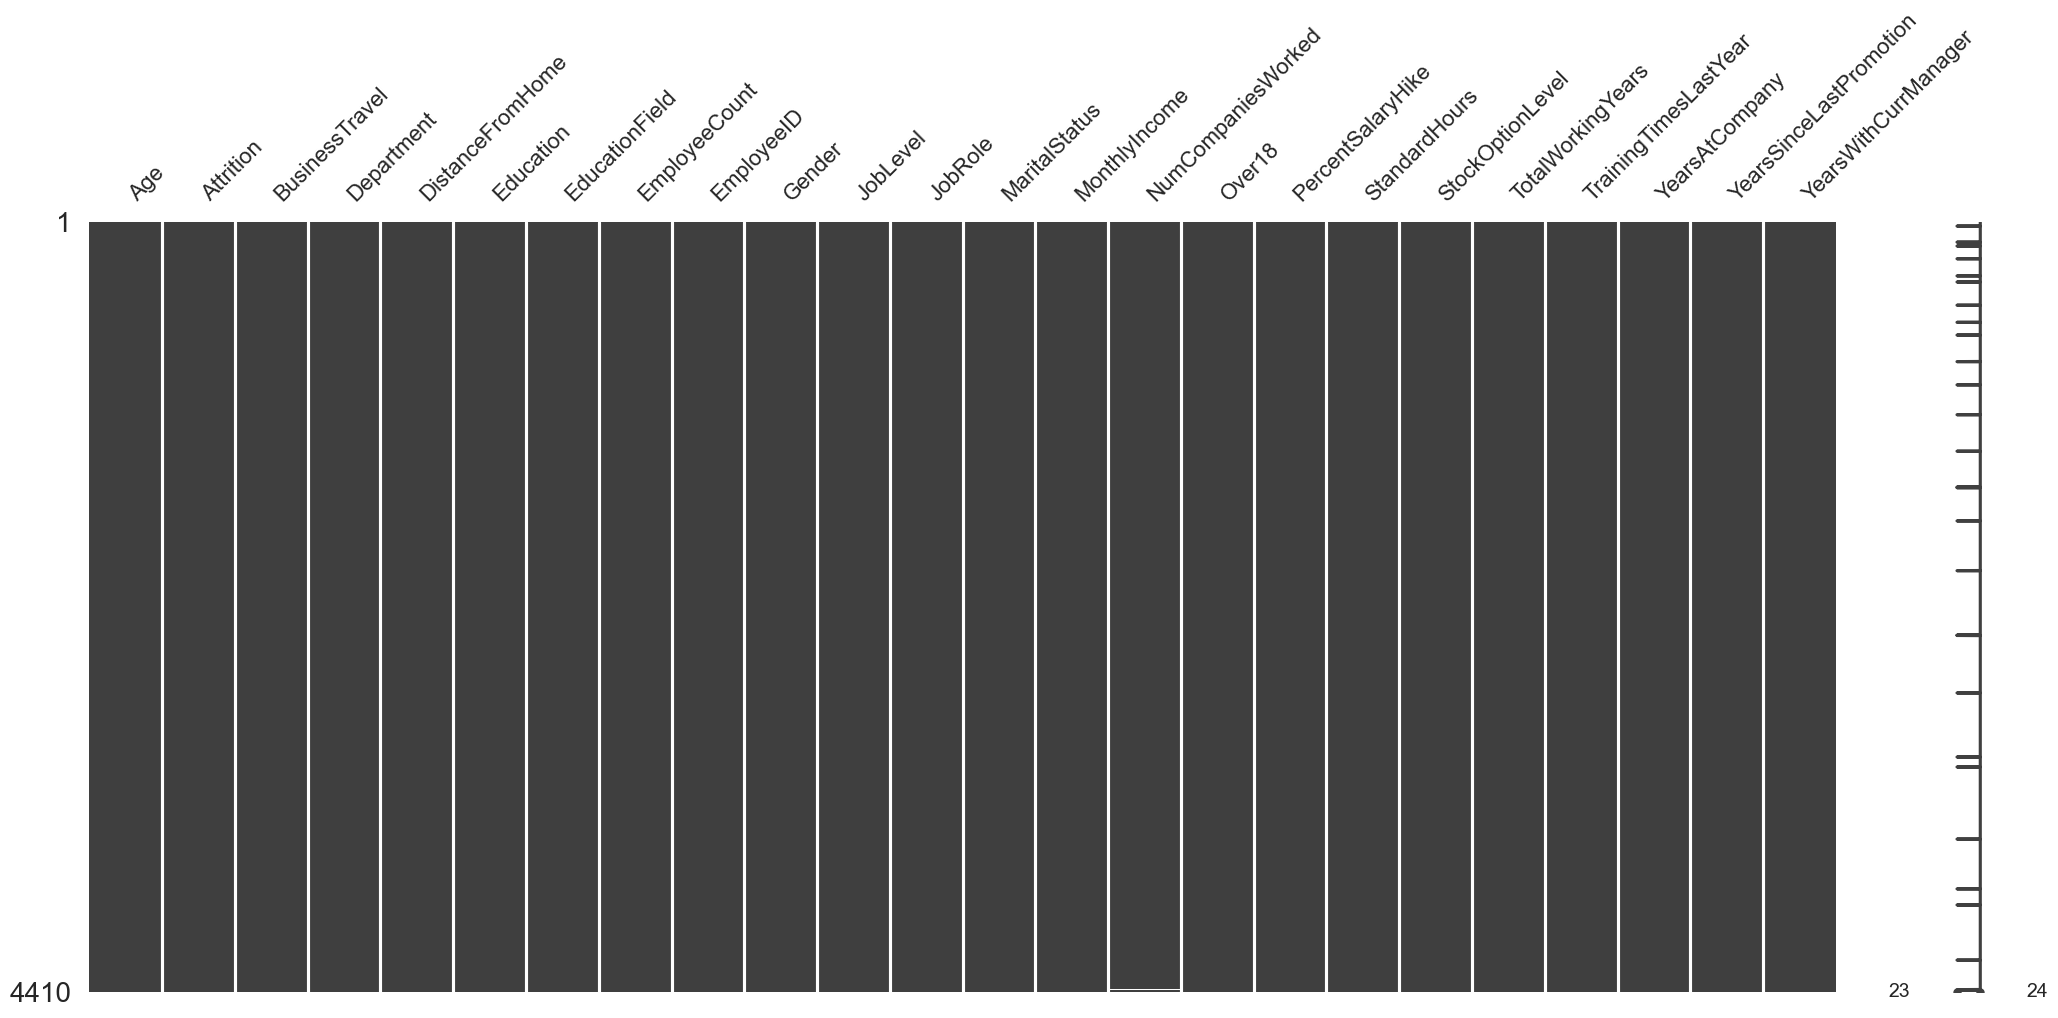

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64


In [21]:
# Visualiser les valeurs manquantes
msno.matrix(general_df)
plt.show()

# Imputer les valeurs manquantes
# Colonnes numériques : médiane
numerical_columns = general_df.select_dtypes(include=['float64', 'int64']).columns
general_df[numerical_columns] = general_df[numerical_columns].fillna(general_df[numerical_columns].median())

# Colonnes catégorielles : mode
categorical_columns = general_df.select_dtypes(include=['object']).columns
general_df[categorical_columns] = general_df[categorical_columns].fillna(general_df[categorical_columns].mode().iloc[0])

# Vérifier qu'il n'y a plus de valeurs manquantes
print(general_df.isnull().sum())

<h3>Histogramme avant et après imputation des valeurs manquantes</h3>

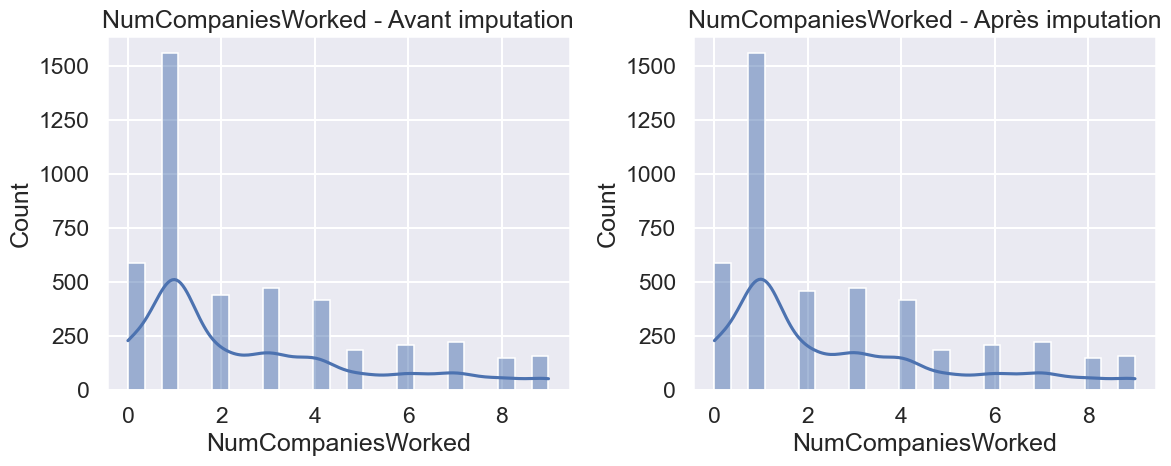

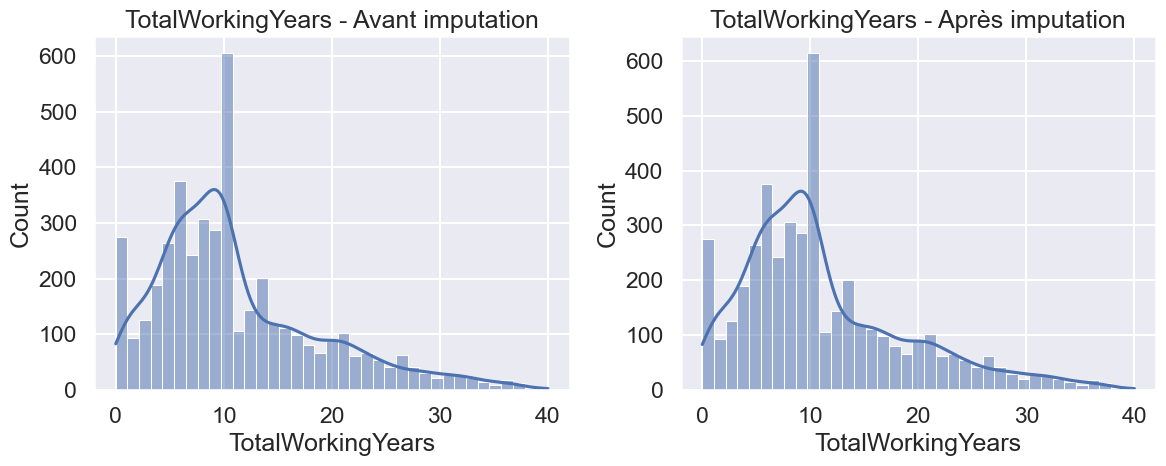

In [ ]:
for col in missing_cols:
    
    # Avant imputation
    plt.subplot(1, 2, 1)
    sns.histplot(general_df_before[col].dropna(), kde=True)
    plt.title(f"{col} - Avant imputation")
    
    # Après imputation
    plt.subplot(1, 2, 2)
    sns.histplot(general_df[col], kde=True)
    plt.title(f"{col} - Après imputation")
    
    plt.tight_layout()
    plt.show()

<h3>Sauvegarde du dataset nettoyé</h3>

In [23]:
# Nom du dossier
folder = "Data_cleaned"

# Créer le dossier s'il n'existe pas
os.makedirs(folder, exist_ok=True)

# Sauvegarder le DataFrame dans ce dossier
general_df.to_csv(f"{folder}/general_data.csv", index=False)